In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


In [ ]:
df = pd.read_csv("dataset/weather_data.csv")

df.head()
—

,Date,Temperature,Humidity,Rainfall,WindSpeed
0,2023-01-01,30.5,77,8.5,7.2
1,2023-01-02,27.3,92,1.5,5.3
2,2023-01-03,31.2,45,0.9,9.2
3,2023-01-04,35.6,83,5.5,9.4
4,2023-01-05,26.8,84,13.3,8.1


In [3]:
#Exploring the data
df.shape


(365, 5)

In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Humidity     365 non-null    int64  
 3   Rainfall     365 non-null    float64
 4   WindSpeed    365 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.4+ KB


In [5]:
df.describe()


,Temperature,Humidity,Rainfall,WindSpeed
count,365.000000,365.000000,365.000000,365.000000
mean,28.051233,67.049315,4.741096,8.002192
std,4.741572,16.137554,4.506718,1.953187
min,11.800000,40.000000,0.000000,1.000000
25%,24.700000,53.000000,1.400000,6.600000
50%,28.300000,67.000000,3.400000,8.000000
75%,31.100000,81.000000,6.700000,9.300000
max,47.300000,94.000000,28.800000,13.900000


In [6]:
df.isnull().sum()


Date           0
Temperature    0
Humidity       0
Rainfall       0
WindSpeed      0
dtype: int64

In [7]:
#Data cleaning starts here

df.drop_duplicates(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df.fillna(0, inplace=True)

df.isnull().sum()



Date           0
Temperature    0
Humidity       0
Rainfall       0
WindSpeed      0
dtype: int64

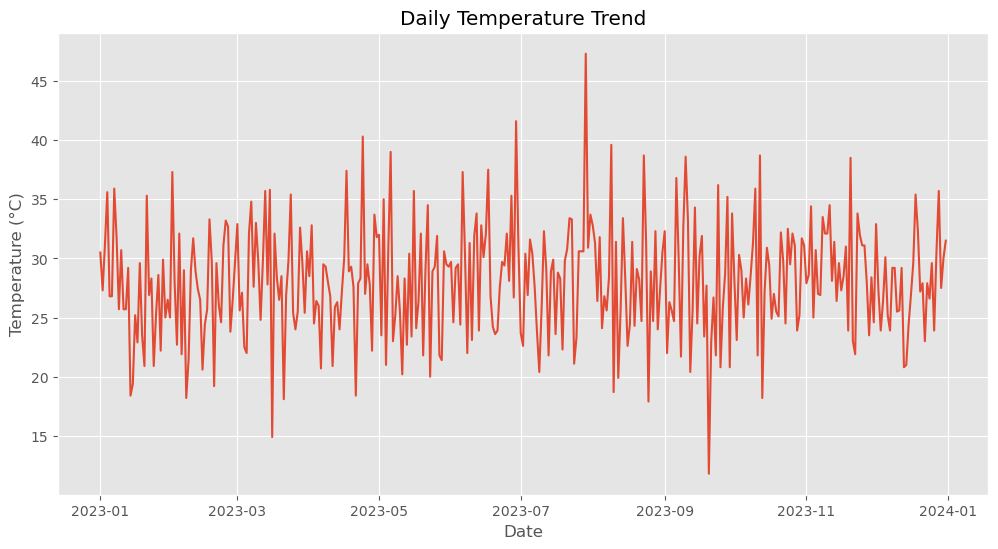

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Temperature'])
plt.title("Daily Temperature Trend")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")

plt.savefig("visualizations/temperature_trend.png")
plt.show()


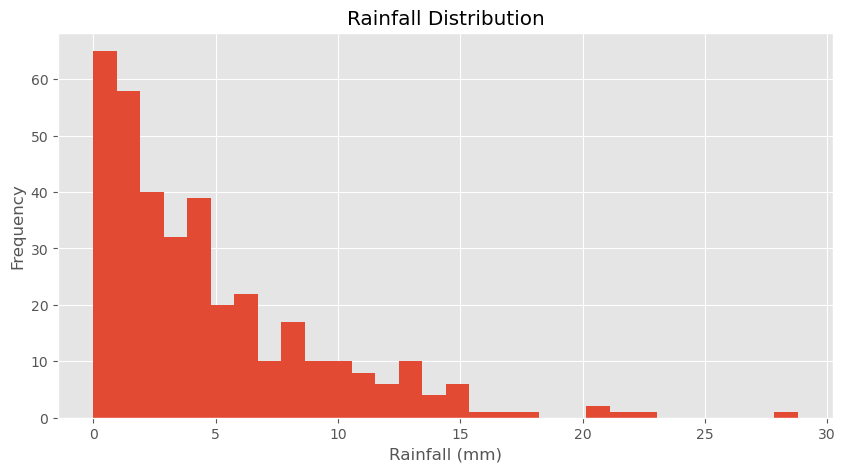

In [9]:
plt.figure(figsize=(10,5))
df['Rainfall'].plot(kind='hist', bins=30)

plt.title("Rainfall Distribution")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")

plt.savefig("visualizations/rainfall_distribution.png")
plt.show()


In [10]:
df['Month'] = df['Date'].dt.month


In [11]:
monthly_temp = df.groupby('Month')['Temperature'].mean()

monthly_temp


Month
1     26.990323
2     27.292857
3     28.225806
4     27.896667
5     27.580645
6     29.456667
7     28.503226
8     27.883871
9     27.543333
10    28.322581
11    29.156667
12    27.748387
Name: Temperature, dtype: float64

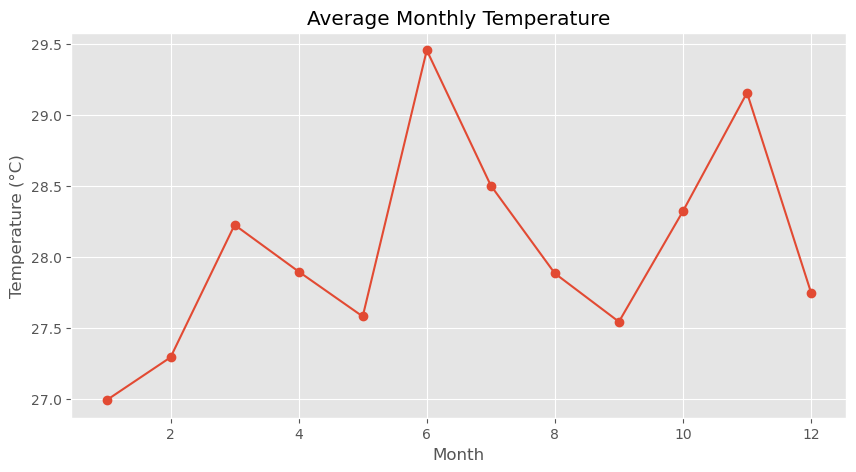

In [12]:
plt.figure(figsize=(10,5))
monthly_temp.plot(kind='line', marker='o')

plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")

plt.savefig("visualizations/monthly_temperature.png")
plt.show()


In [13]:
extreme_days = df[(df['Temperature'] > 35) | (df['Rainfall'] > 20)]
extreme_days.head()


,Date,Temperature,Humidity,Rainfall,WindSpeed,Month
3,2023-01-04,35.6,83,5.5,9.4,1
6,2023-01-07,35.9,84,4.2,6.6,1
20,2023-01-21,35.3,80,3.8,5.6,1
25,2023-01-26,28.6,40,23.0,12.6,1
31,2023-02-01,37.3,62,4.5,7.0,2


In [14]:
extreme_days.shape


(30, 6)

###  Weather Insights

 1. Temperature fluctuates consistently through the year, with warm peaks during certain months.  
 2. Rainfall is mostly low, with occasional high spikes indicating heavy rain events.  
 3. Monthly temperature averages show clear seasonal patterns.  
 4. Several extreme weather days were detected (high heat or heavy rainfall).  
 5. Humidity levels contribute to noticeable environmental changes across months.


###  Recommendations

1. Prepare for extreme heat conditions in high temperature months.
2. Develop rainwater storage plans during high rainfall periods.
3. Use seasonal patterns for better urban planning and energy management.
4. Implement public alerts during extreme weather spikes.
5. Use long-term weather trends for predictive analytics and planning.
